# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [21]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 582


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=" + weather_api_key

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = city_url = url + "&q=" + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | phetchabun
Processing Record 2 of Set 1 | mount gambier
Processing Record 3 of Set 1 | st. john's
Processing Record 4 of Set 1 | blackmans bay
Processing Record 5 of Set 1 | papatowai
Processing Record 6 of Set 1 | puerto ayora
Processing Record 7 of Set 1 | ilulissat
Processing Record 8 of Set 1 | adamstown
Processing Record 9 of Set 1 | edinburgh of the seven seas
Processing Record 10 of Set 1 | bethel
Processing Record 11 of Set 1 | aasiaat
Processing Record 12 of Set 1 | margate
Processing Record 13 of Set 1 | tomatlan
Processing Record 14 of Set 1 | dunedin
Processing Record 15 of Set 1 | katsuura
Processing Record 16 of Set 1 | puerto baquerizo moreno
Processing Record 17 of Set 1 | pandan
Processing Record 18 of Set 1 | vilyuchinsk
Processing Record 19 of Set 1 | tofol
Processing Record 20 of Set 1 | waitangi
Processing Record 21 of Set 1 | celestun
Processing Record 22 of Set 1 | planadas

Processing Record 39 of Set 4 | vila franca do campo
Processing Record 40 of Set 4 | road town
Processing Record 41 of Set 4 | kruisfontein
Processing Record 42 of Set 4 | plettenberg bay
Processing Record 43 of Set 4 | makhambet
Processing Record 44 of Set 4 | karratha
Processing Record 45 of Set 4 | mejit
Processing Record 46 of Set 4 | sinazongwe
Processing Record 47 of Set 4 | dudinka
Processing Record 48 of Set 4 | jamestown
Processing Record 49 of Set 4 | utrik
Processing Record 0 of Set 5 | elmendorf air force base
City not found. Skipping...
Processing Record 1 of Set 5 | bodo
Processing Record 2 of Set 5 | east ballina
Processing Record 3 of Set 5 | ilha de mocambique
Processing Record 4 of Set 5 | diu
Processing Record 5 of Set 5 | tobruk
Processing Record 6 of Set 5 | balabac
Processing Record 7 of Set 5 | tazovsky
Processing Record 8 of Set 5 | ambon
Processing Record 9 of Set 5 | severo-yeniseyskiy
Processing Record 10 of Set 5 | kapuskasing
Processing Record 11 of Set 5 |

Processing Record 30 of Set 8 | joshimath
Processing Record 31 of Set 8 | sao gabriel da cachoeira
Processing Record 32 of Set 8 | vilyuysk
Processing Record 33 of Set 8 | zouerate
Processing Record 34 of Set 8 | bandarbeyla
Processing Record 35 of Set 8 | taltal
Processing Record 36 of Set 8 | suining
Processing Record 37 of Set 8 | luoyang
Processing Record 38 of Set 8 | petal
Processing Record 39 of Set 8 | plattsmouth
Processing Record 40 of Set 8 | camas
Processing Record 41 of Set 8 | yorkton
Processing Record 42 of Set 8 | turpan
Processing Record 43 of Set 8 | lupao
Processing Record 44 of Set 8 | haiku-pauwela
Processing Record 45 of Set 8 | tawau
Processing Record 46 of Set 8 | port douglas
Processing Record 47 of Set 8 | gadzhiyevo
Processing Record 48 of Set 8 | zhigalovo
Processing Record 49 of Set 8 | tual
Processing Record 0 of Set 9 | ratnagiri
Processing Record 1 of Set 9 | arno
Processing Record 2 of Set 9 | bhilwara
Processing Record 3 of Set 9 | conceicao da barra
P

Processing Record 19 of Set 12 | male
Processing Record 20 of Set 12 | usevia
Processing Record 21 of Set 12 | kidal
Processing Record 22 of Set 12 | kozhevnikovo
Processing Record 23 of Set 12 | ghadamis
Processing Record 24 of Set 12 | yauya
Processing Record 25 of Set 12 | santa cruz
Processing Record 26 of Set 12 | coquimbo
Processing Record 27 of Set 12 | gonabad
Processing Record 28 of Set 12 | ghat
Processing Record 29 of Set 12 | nelson bay
Processing Record 30 of Set 12 | rahim yar khan
City not found. Skipping...
Processing Record 31 of Set 12 | rurrenabaque
-----------------------------
Data Retrieval Complete      
-----------------------------


In [5]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          554
Lat           554
Lng           554
Max Temp      554
Humidity      554
Cloudiness    554
Wind Speed    554
Country       554
Date          554
dtype: int64

In [6]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,phetchabun,16.2500,101.0833,21.15,77,100,2.80,TH,1700182235
1,mount gambier,-37.8333,140.7667,16.20,51,73,3.11,AU,1700182235
2,st. john's,47.5649,-52.7093,0.54,80,100,2.57,CA,1700182192
3,blackmans bay,-43.0167,147.3167,18.62,51,6,0.72,AU,1700182236
4,papatowai,-46.5619,169.4708,8.17,90,100,4.57,NZ,1700182236


In [8]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [9]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,phetchabun,16.2500,101.0833,21.15,77,100,2.80,TH,1700182235
1,mount gambier,-37.8333,140.7667,16.20,51,73,3.11,AU,1700182235
2,st. john's,47.5649,-52.7093,0.54,80,100,2.57,CA,1700182192
3,blackmans bay,-43.0167,147.3167,18.62,51,6,0.72,AU,1700182236
4,papatowai,-46.5619,169.4708,8.17,90,100,4.57,NZ,1700182236


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

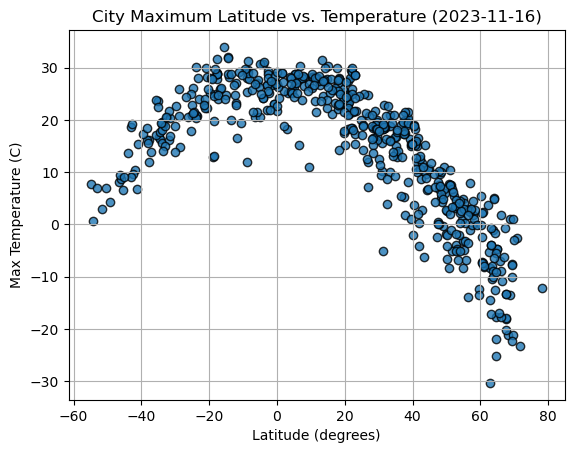

In [11]:
# Build scatter plot for latitude vs. temperature
plt.scatter(     
    city_data_df["Lat"],
    city_data_df["Max Temp"],
    edgecolor="black",
    linewidths=1,
    marker="o", 
    alpha=0.8,
    label="Cities"
)

# Incorporate the other graph properties
# YOUR CODE HERE
plt.title("City Maximum Latitude vs. Temperature (%s)" % time.strftime("%Y-%m-%d"))
plt.xlabel("Latitude (degrees)")
plt.ylabel("Max Temperature (C)")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

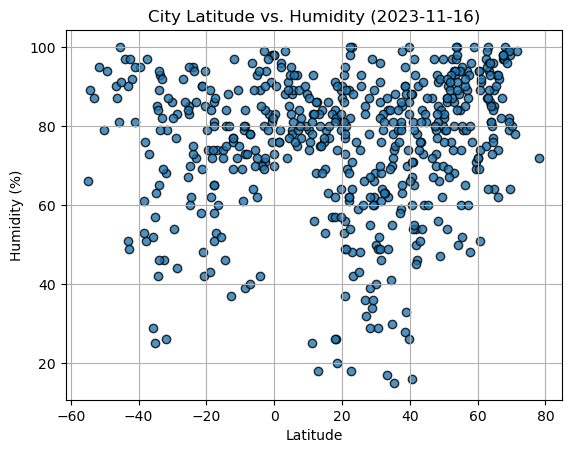

In [13]:
# Build the scatter plots for latitude vs. humidity
# YOUR CODE HERE
plt.scatter(     
    city_data_df["Lat"],
    city_data_df["Humidity"],
    edgecolor="black",
    linewidths=1,
    marker="o", 
    alpha=0.8,
    label="Cities"
)

# Incorporate the other graph properties
# YOUR CODE HERE
plt.title("City Latitude vs. Humidity (%s)" % time.strftime("%Y-%m-%d"))
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

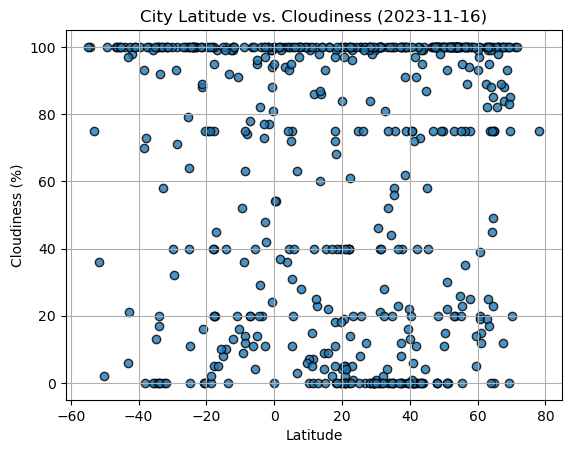

In [14]:
# Build the scatter plots for latitude vs. cloudiness
# YOUR CODE HERE
plt.scatter(
    city_data_df["Lat"],
    city_data_df["Cloudiness"],
    edgecolor="black",
    linewidths=1,
    marker="o", 
    alpha=0.8,
    label="Cities"
)

# Incorporate the other graph properties
# YOUR CODE HERE
plt.title("City Latitude vs. Cloudiness (%s)" % time.strftime("%Y-%m-%d"))
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

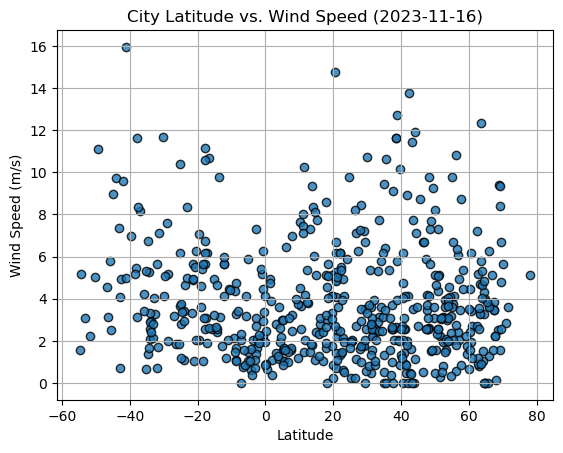

In [15]:
# Build the scatter plots for latitude vs. wind speed
# YOUR CODE HERE
plt.scatter(
    city_data_df["Lat"], 
    city_data_df["Wind Speed"],
    edgecolor="black", 
    linewidths=1, 
    marker="o", 
    alpha=0.8,
    label="Cities"
)

# Incorporate the other graph properties
# YOUR CODE HERE
plt.title("City Latitude vs. Wind Speed (%s)" % time.strftime("%Y-%m-%d"))
plt.ylabel("Wind Speed (m/s)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [24]:
# Define a function to create Linear Regression plots
# YOUR CODE HERE
def lr_plot(x_values, y_values, title, text_coordinates):
    
    # Compute linear regression
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    # Plot
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,text_coordinates,fontsize=15,color="red")
    plt.xlabel("Latitude")
    plt.ylabel(title)
    print(f"The r-value is: {rvalue**2}")
    plt.show()

In [16]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
# YOUR CODE HERE
north_hem_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]

# Display sample data
north_hem_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,phetchabun,16.2500,101.0833,21.15,77,100,2.80,TH,1700182235
2,st. john's,47.5649,-52.7093,0.54,80,100,2.57,CA,1700182192
6,ilulissat,69.2167,-51.1000,-9.99,79,0,1.54,GL,1700182237
9,bethel,41.3712,-73.4140,12.02,65,0,0.45,US,1700182221
10,aasiaat,68.7098,-52.8699,-13.43,99,93,2.52,GL,1700182238


In [19]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
# YOUR CODE HERE
south_hem_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

# Display sample data
south_hem_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,mount gambier,-37.8333,140.7667,16.20,51,73,3.11,AU,1700182235
3,blackmans bay,-43.0167,147.3167,18.62,51,6,0.72,AU,1700182236
4,papatowai,-46.5619,169.4708,8.17,90,100,4.57,NZ,1700182236
5,puerto ayora,-0.7393,-90.3518,23.08,98,99,2.24,EC,1700182236
7,adamstown,-25.0660,-130.1015,20.95,85,100,3.63,PN,1700182237


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: 0.7985110684708907


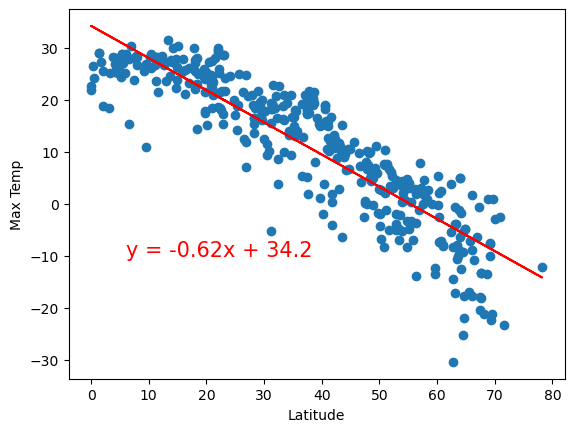

In [25]:
# Linear regression on Northern Hemisphere
# YOUR CODE HERE
x_values = north_hem_df["Lat"]
y_values = north_hem_df["Max Temp"]
lr_plot(x_values, y_values, "Max Temp",(6,-10))

The r-value is: 0.5998619869017368


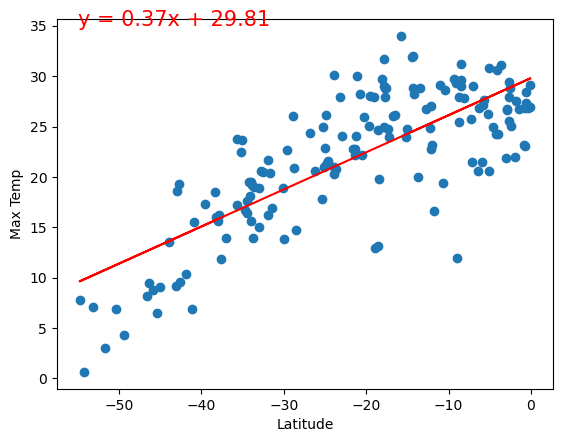

In [26]:
# Linear regression on Southern Hemisphere
# YOUR CODE HERE
x_values = south_hem_df["Lat"]
y_values = south_hem_df["Max Temp"]
lr_plot(x_values, y_values, "Max Temp", (-55, 35))

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.03190805522518602


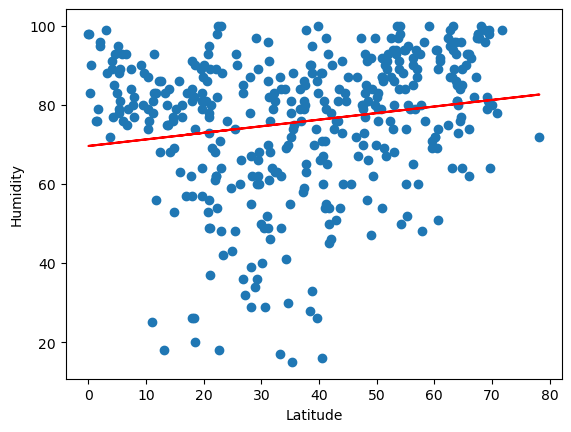

In [27]:
# Northern Hemisphere
# YOUR CODE HERE
x_values = north_hem_df["Lat"]
y_values = north_hem_df["Humidity"]
lr_plot(x_values, y_values, "Humidity",(40,10))

The r-value is: 1.3110006591367962e-07


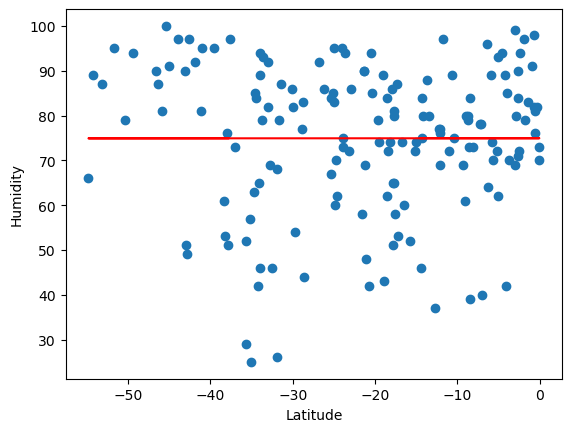

In [29]:
# Southern Hemisphere
# YOUR CODE HERE
x_values = south_hem_df["Lat"]
y_values = south_hem_df["Humidity"]
lr_plot(x_values, y_values, "Humidity", (-50, 20))

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.02766641277505481


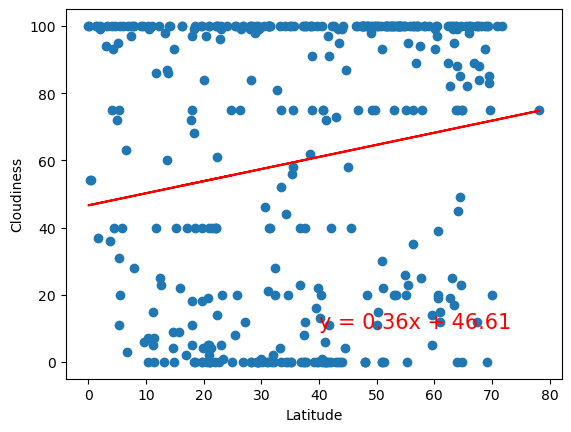

In [30]:
# Northern Hemisphere
# YOUR CODE HERE
x_values = north_hem_df["Lat"]
y_values = north_hem_df["Cloudiness"]
lr_plot(x_values, y_values, "Cloudiness", (40,10))

The r-value is: 0.01237420379004993


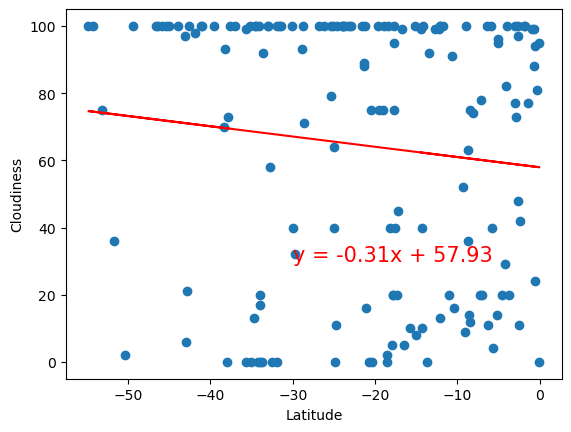

In [31]:
# Southern Hemisphere
# YOUR CODE HERE
x_values = south_hem_df["Lat"]
y_values = south_hem_df["Cloudiness"]
lr_plot(x_values, y_values, "Cloudiness", (-30,30))

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.0015442311410379173


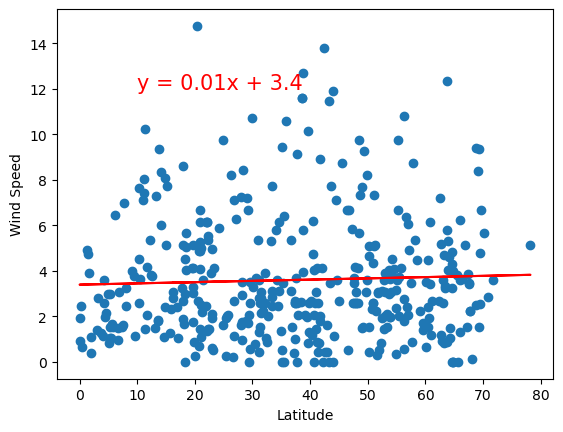

In [32]:
# Northern Hemisphere
# YOUR CODE HERE
x_values = north_hem_df["Lat"]
y_values = north_hem_df["Wind Speed"]
lr_plot(x_values, y_values, "Wind Speed", (10,12))

The r-value is: 0.09596411228786053


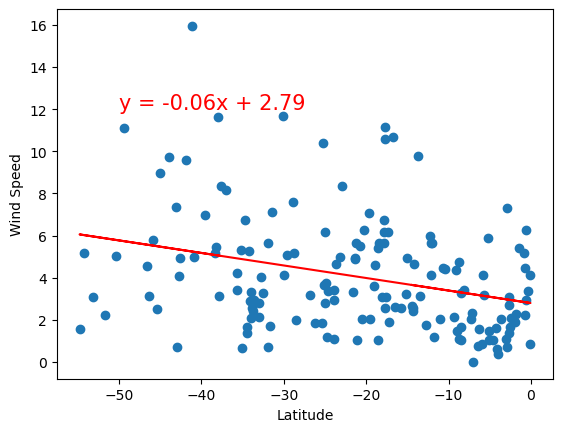

In [33]:
# Southern Hemisphere
# YOUR CODE HERE
x_values = south_hem_df["Lat"]
y_values = south_hem_df["Wind Speed"]
lr_plot(x_values, y_values, "Wind Speed", (-50, 12))

**Discussion about the linear relationship:** YOUR RESPONSE HERE